# Basics of Deep Learning

In [1]:
student_id = 400101956
student_name = "Mohammad Morsali"

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Do not add or delete any cells from the notebook. You may add new cells to perform scatch work, but delete them before submitting.
- Run all cells before submitting. You will only get credit for code that has been run.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook).

# I run my codes on KAGGLE, So I will change the next cells to adapt the notebook with kaggle

In [2]:
# # This mounts your Google Drive to the Colab VM.
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# # TODO: Enter the foldername in your Drive where you have saved the
# # assignment files, e.g. 'DL/assignments/assignment1/'
# FOLDERNAME = None
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# # Now that we've mounted your Drive, this ensures that
# # the Python interpreter of the Colab VM can load
# # python files from within it.
# import sys
# sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

The dataset for this exercise is CIFAR-10. Let's first download it then we'll explore it.

In [4]:
# # This downloads the CIFAR-10 dataset to your Drive
# # if it doesn't already exist.
# %cd /content/drive/My\ Drive/$FOLDERNAME/datasets/
# !bash get_datasets.sh
# %cd /content/drive/My\ Drive/$FOLDERNAME

In [5]:
# import os
# import pytz
# from datetime import datetime

# # The file path
# GOOGLE_DRIVE_PATH = '/content/drive/My Drive/{}'.format(FOLDERNAME)
# pytorch_path = os.path.join(GOOGLE_DRIVE_PATH, 'k_nearest_neighbor.py')

# # Get the last modified time in UTC
# last_modified_time = os.path.getmtime(pytorch_path)
# utc_time = datetime.utcfromtimestamp(last_modified_time)

# # Define Iran's time zone
# iran_tz = pytz.timezone('Asia/Tehran')

# # Convert UTC time to Iran time
# iran_time = pytz.utc.localize(utc_time).astimezone(iran_tz)

# # Print the result in Iran's local time
# print(f"k_nearest_neighbor.py last edited on: {iran_time.strftime('%Y-%m-%d %H:%M:%S')}")

In [6]:
import os
import pytz
from datetime import datetime
import random
import numpy as np
import matplotlib.pyplot as plt
import sys

In [7]:

if not os.path.exists("cifar-10-batches-py"):
    !wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
    !tar -xzvf cifar-10-python.tar.gz
    !rm cifar-10-python.tar.gz
    print("CIFAR-10 dataset downloaded and extracted.")

if not os.path.exists("imagenet_val_25.npz"):
    !wget http://cs231n.stanford.edu/imagenet_val_25.npz
    print("imagenet_val_25.npz downloaded.")
else:
    print("imagenet_val_25.npz already exists.")


--2024-10-25 23:26:33--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: 'cifar-10-python.tar.gz'

cifar-10-python.tar 100%[===================>] 162.60M  46.2MB/s    in 3.9s    

2024-10-25 23:26:37 (41.7 MB/s) - 'cifar-10-python.tar.gz' saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
CIFAR-10 dataset downloaded and extracted.
--2024-10-25 23:26:42--  http://cs231n.stanford.edu/imagenet_val_25.npz
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.64.64
Conne

In [8]:
FOLDERNAME = '/kaggle/working/'

assert os.path.exists(FOLDERNAME), "[!] The folder path does not exist. Check your path or add the dataset."

pytorch_path = os.path.join(FOLDERNAME, '/kaggle/input/iraniran/k_nearest_neighbor.py')

last_modified_time = os.path.getmtime(pytorch_path)
utc_time = datetime.utcfromtimestamp(last_modified_time)

iran_tz = pytz.timezone('Asia/Tehran')

iran_time = pytz.utc.localize(utc_time).astimezone(iran_tz)

print(f"k_nearest_neighbor.py last edited on: {iran_time.strftime('%Y-%m-%d %H:%M:%S')}")


k_nearest_neighbor.py last edited on: 2024-10-26 02:56:18


# k-Nearest Neighbor (kNN)

The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated

You will implement these steps in this notebook and understand the basic Image Classification pipeline, cross-validation, and gain proficiency in writing efficient, vectorized code.

The following code is to setup the enviroment

In [9]:

!mkdir -p /root/.config/kaggle


!cp /kaggle/input/kaggle/kaggle.json /root/.config/kaggle/

!chmod 600 /root/.config/kaggle/kaggle.json

if os.path.exists("/root/.config/kaggle/kaggle.json"):
    print("kaggle.json moved to /root/.config/kaggle/ successfully.")
else:
    print("Failed to move kaggle.json.")


kaggle.json moved to /root/.config/kaggle/ successfully.


In [10]:


sys.path.append('/kaggle/input/data-utils')

from data_utils import load_CIFAR10

# This is to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# This is here so that the notebook will reload external Python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [11]:
# Load the raw CIFAR-10 data.
cifar10_dir = '/kaggle/working/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [12]:
################################################################################
# TODO:                                                                        #
# As a sanity check, print out the size of the training and test data and      #
# also the size of their labels                                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Print the shapes of the data and labels as a sanity check
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


Unique classes in the dataset: [0 1 2 3 4 5 6 7 8 9]


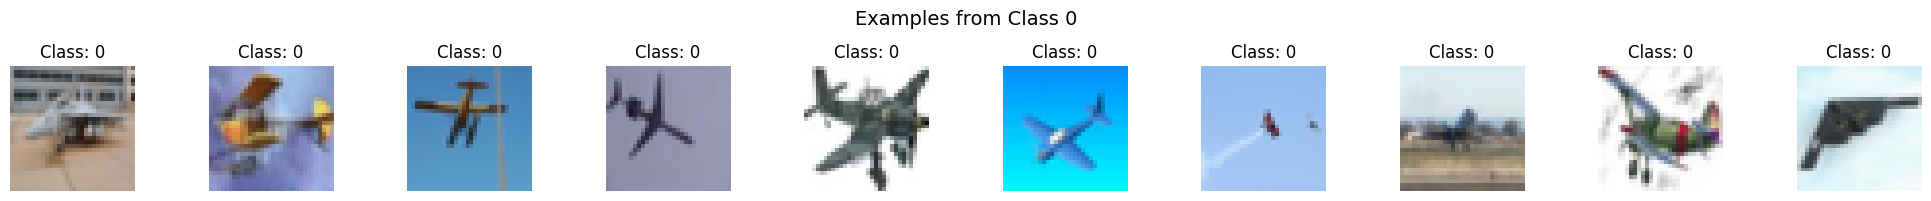

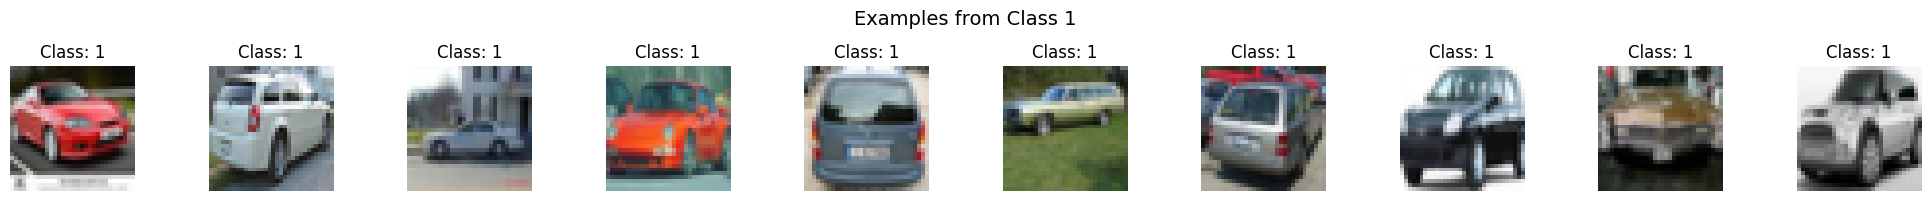

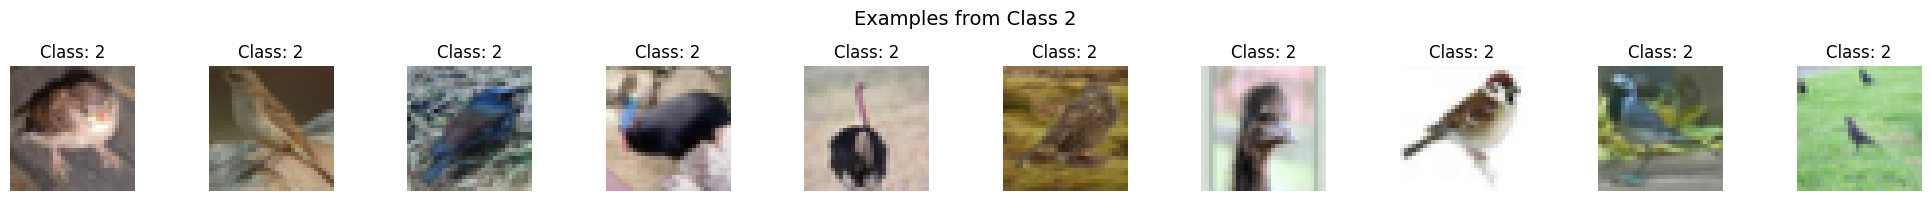

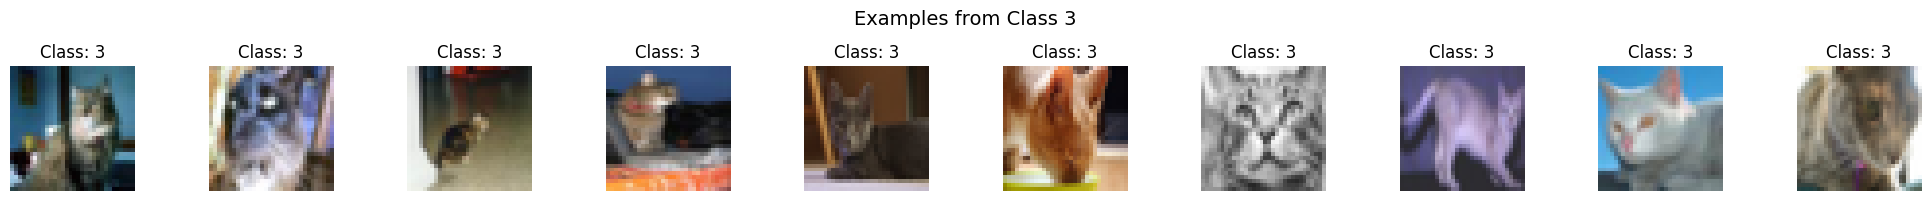

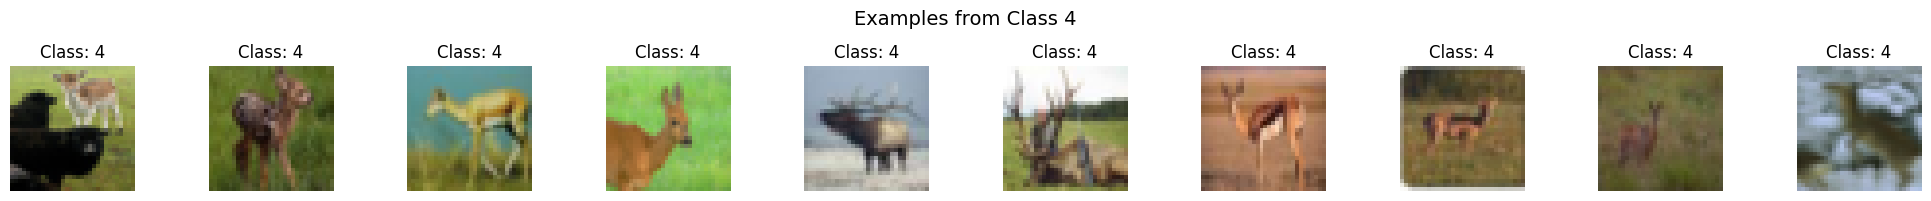

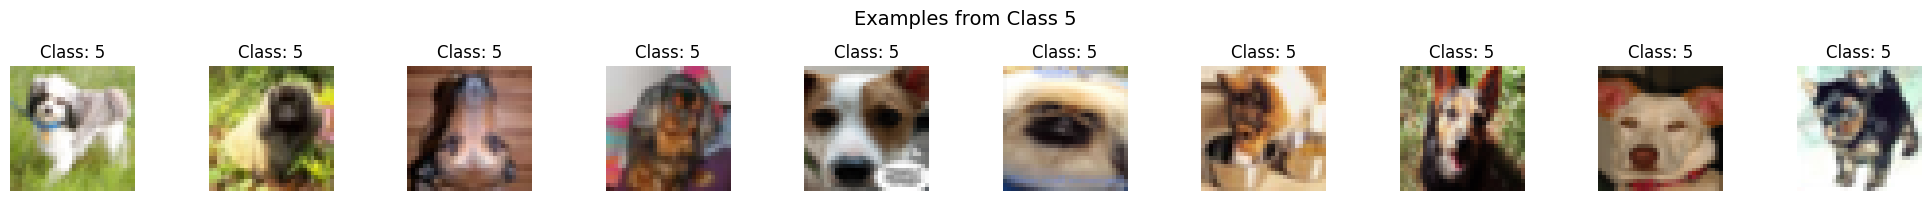

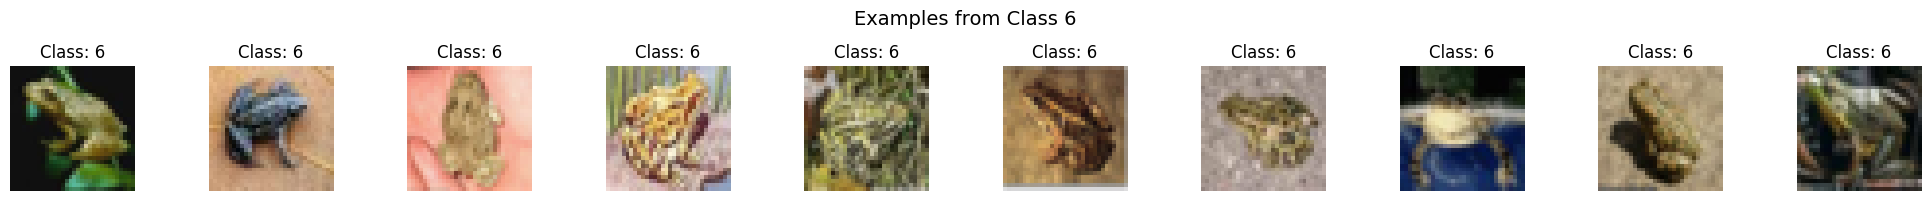

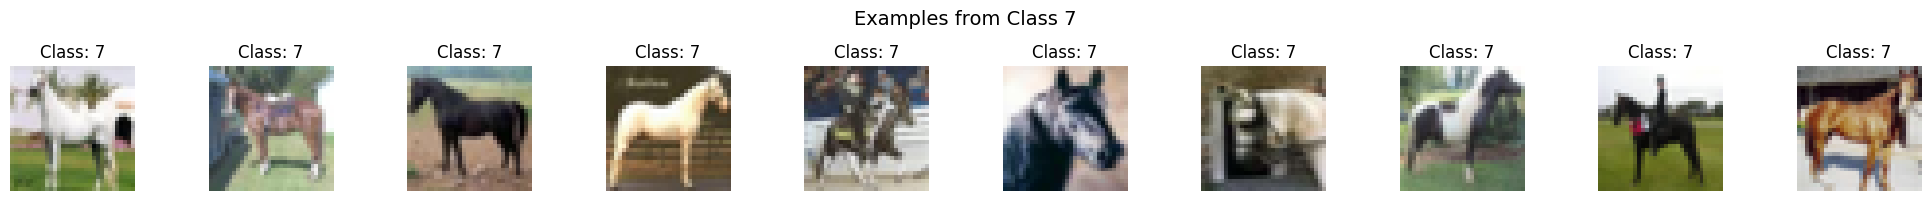

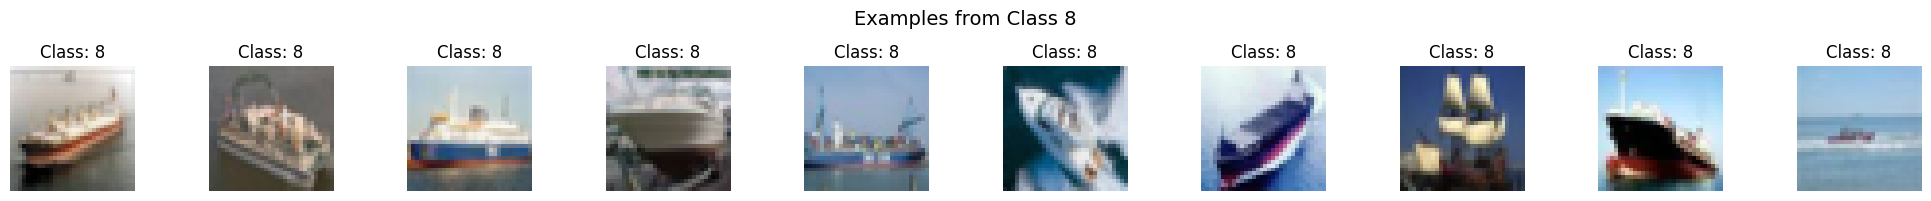

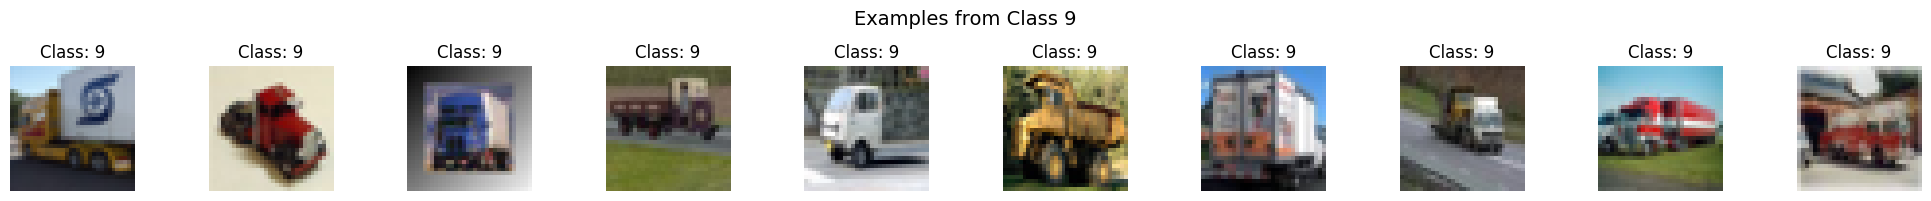

In [13]:
class_labels = np.unique(y_train)
print(f"Unique classes in the dataset: {class_labels}")

num_classes = len(class_labels)
examples_per_class = 10  


################################################################################
# TODO:                                                                        #
# Explore the dataset and find its classes. Then visualize some examples.      #
# To do so show a few examples of training images from each class              #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
# Set the number of classes and samples to display per class for visualization

# Enhanced visualization: Display examples for each class in the dataset
for label in class_labels:
    # Find indices of images corresponding to the current class label
    label_indices = np.flatnonzero(y_train == label)
    
    # Ensure we can select the specified number of examples
    if len(label_indices) < examples_per_class:
        print(f"Warning: Class {label} has fewer than {examples_per_class} images.")
        selected_indices = label_indices
    else:
        selected_indices = np.random.choice(label_indices, examples_per_class, replace=False)

    # Set up a figure to display the selected images for the current class
    fig, axs = plt.subplots(1, len(selected_indices), figsize=(len(selected_indices) * 2, 2))
    
    for idx, ax in zip(selected_indices, axs.flat):
        # Retrieve and display each image
        image_data = X_train[idx].astype(np.uint8)
        if image_data.ndim == 2:  # Check if the image is grayscale
            ax.imshow(image_data, cmap="gray")
        else:
            ax.imshow(image_data)
        
        ax.axis("off")
        ax.set_title(f"Class: {label}")

    plt.suptitle(f"Examples from Class {label}", fontsize=14)
    plt.tight_layout()
    plt.show()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

In [14]:
################################################################################
# TODO:                                                                        #
# Subsample the data for more efficient code execution in this exercise.       #
# You should reduce the number of training and test examples used.             #
# Set num_training to 5000 and num_test to 500.                                #
# Reshape the image data into rows to prepare for processing.                  #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Define reduced sample sizes for training and test datasets
num_train_samples = 5000
num_test_samples = 500

# Generate indices for training and test data
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0])

# Shuffle the indices
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Select the first 'num_train_samples' and 'num_test_samples' indices after shuffling
train_indices_subset = train_indices[:num_train_samples]
test_indices_subset = test_indices[:num_test_samples]

# Create smaller subsets of the training and test data
X_train_subset = X_train[train_indices_subset]
y_train_subset = y_train[train_indices_subset]
X_test_subset = X_test[test_indices_subset]
y_test_subset = y_test[test_indices_subset]

# Reshape image data into a two-dimensional array (rows) for processing efficiency
X_train_flat = X_train_subset.reshape(num_train_samples, -1)
X_test_flat = X_test_subset.reshape(num_test_samples, -1)

# Sanity check: Display the shapes of the reshaped data arrays
print(f"Reshaped training data shape (X_train_flat): {X_train_flat.shape}")
print(f"Reshaped test data shape (X_test_flat): {X_test_flat.shape}")

# Additional checks to ensure that labels have been subsampled correctly
print(f"Subset of training labels shape (y_train_subset): {y_train_subset.shape}")
print(f"Subset of test labels shape (y_test_subset): {y_test_subset.shape}")

pass


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Reshaped training data shape (X_train_flat): (5000, 3072)
Reshaped test data shape (X_test_flat): (500, 3072)
Subset of training labels shape (y_train_subset): (5000,)
Subset of test labels shape (y_test_subset): (500,)


In [15]:


!cp /kaggle/input/iraniran/k_nearest_neighbor.py /kaggle/working/
import sys
sys.path.append('/kaggle/working/')
from k_nearest_neighbor import KNearestNeighbor
import importlib
import k_nearest_neighbor
importlib.reload(k_nearest_neighbor)
from k_nearest_neighbor import KNearestNeighbor

################################################################################
# TODO:                                                                        #
# Create a kNN classifier instance and call its training method.               #
# Remember that training a kNN classifier is a noop:                           #
# the classifier simply remembers the data and does no further processing.     #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Instantiate the kNN classifier
knn_classifier = KNearestNeighbor()

# Call the training method with the subsampled training data
knn_classifier.train(X_train_flat, y_train_subset)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


We would now like to classify the test data with the kNN classifier. Recall that we can break down this process into two steps:

1. First we must compute the distances between all test examples and all train examples.
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

Lets begin with computing the distance matrix between all training and test examples. For example, if there are **Ntr** training examples and **Nte** test examples, this stage should result in a **Nte x Ntr** matrix where each element (i,j) is the distance between the i-th test and j-th train example.

**Note: For the three distance computations that we require you to implement in this notebook, you may not use the np.linalg.norm() function that numpy provides.**

First, open `k_nearest_neighbor.py` and implement the function `compute_distances_two_loops` that uses a (very inefficient) double loop over all pairs of (test, train) examples and computes the distance matrix one element at a time.

In [16]:
# Open k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# TODO: Test your implementation:
dists = knn_classifier.compute_distances_two_loops(X_test_flat)
print(dists.shape)

(500, 5000)


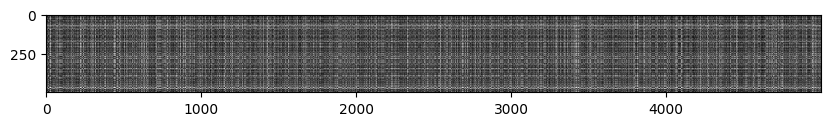

In [17]:
# We can visualize the distance matrix: each row is a single test example and
# its distances to training examples
plt.imshow(dists, interpolation='none')
plt.show()

**Inline Question 1**

Notice the structured patterns in the distance matrix, where some rows or columns are visibly brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

$\color{pink}{\textit Your Answer:}$

When visualizing the distance matrix computed during the k-Nearest Neighbors (k-NN) algorithm, you might observe structured patterns where some rows or columns appear distinctly brighter than others. In the context of the distance matrix:

- **Rows** correspond to **test samples**.
- **Columns** correspond to **training samples**.
- Each element `[i, j]` represents the distance between the **ith test sample** and the **jth training sample**.
- **Brightness** in the matrix indicates the magnitude of the distance:
  - **Brighter (white)**: Higher distances.
  - **Darker (black)**: Lower distances.

**Understanding the Causes:**

---

### **1. Distinctly Bright Rows:**

**Cause:** Bright rows occur when a test sample has consistently **large distances** to all training samples.

**Explanation:**

- **Outlier Test Samples:** The test sample corresponding to the bright row is likely an outlier or significantly different from the training data.
- **Unique Feature Values:** It may contain feature values that are not present in the training set, causing high distances across the board.
- **Different Data Distribution:** The sample might come from a different distribution or class not represented in the training data.
- **Preprocessing Issues:** Inconsistent preprocessing (e.g., scaling, normalization) between training and test data can lead to such discrepancies.

**Implications:**

- The k-NN classifier may struggle to accurately predict the label for this test sample since it doesn't closely resemble any training samples.
- It suggests a need to examine the test sample for anomalies or consider expanding the training dataset to include similar samples.

---

### **2. Distinctly Bright Columns:**

**Cause:** Bright columns occur when a training sample has consistently **large distances** to all test samples.

**Explanation:**

- **Outlier Training Samples:** The training sample corresponding to the bright column may be an outlier within the training set.
- **Irrelevant or Noisy Data:** It might contain noise or irrelevant features that are not shared with the test data.
- **Different Class Representation:** The training sample could belong to a class not present in the test set.
- **Data Entry Errors:** There may be errors or inconsistencies in the data collection process for that training sample.

**Implications:**

- This training sample contributes less to the classification of test samples, as it's dissimilar to them.
- It might be beneficial to investigate and possibly remove or correct such training samples to improve the classifier's performance.

---

**Additional Considerations:**

- **Feature Scaling:** Ensure that both training and test data have been preprocessed identically. Differences can lead to inflated distances.
- **Data Quality:** High-quality, consistent data helps in reducing such anomalies in the distance matrix.
- **Visualization as a Diagnostic Tool:** Analyzing the distance matrix helps identify outliers and potential issues in the dataset that may affect the classifier's accuracy.

**Conclusion:**

Distinctly bright rows and columns in the distance matrix highlight discrepancies between test and training samples. By identifying and addressing the underlying causes—such as outliers, data preprocessing issues, or inconsistent data distributions—you can improve the effectiveness of the k-NN classifier and achieve more reliable predictions.

In [32]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = knn_classifier.predict_labels(dists, k=1)

# TODO: Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred==y_test_subset)
accuracy = num_correct/len(y_test_subset)
print('%d / %d were correct => accuracy: %f' % (num_correct, num_test_samples, accuracy))

135 / 500 were correct => accuracy: 0.270000


You should expect to see approximately `27%` accuracy. Now lets try out a larger `k`, say `k = 5`:

In [33]:
# TODO: Do the same as before with k=5

y_test_pred = knn_classifier.predict_labels(dists, k=5)

num_correct = np.sum(y_test_pred==y_test_subset)
accuracy = num_correct/len(y_test_subset)
print('%d / %d were correct => accuracy: %f' % (num_correct, num_test_samples, accuracy))

144 / 500 were correct => accuracy: 0.288000


You should expect to see a slightly better performance than with `k = 1`.

**Inline Question 2**

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$,

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply. To clarify, both training and test examples are preprocessed in the same way.

1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data, which means rotating all the images by the same angle. Empty regions in the image caused by rotation are padded with a same pixel value and no interpolation is performed.

**Your Answer:**

**1, 2, and 3**

---

**Your Explanation:**

To determine which preprocessing steps will **not** change the performance of a Nearest Neighbor (NN) classifier using L1 distance, we need to assess whether these steps alter the relative distances between data points. The NN classifier's performance depends on the order of distances between test and training samples. If preprocessing preserves this order, the performance remains unchanged.

Let's analyze each option:

---

### **Option 1:**

**Subtracting the mean** μ:

\[
\tilde{p}_{ij}^{(k)} = p_{ij}^{(k)} - \mu
\]

**Analysis:**

- **Effect on Distances:** Subtracting the same scalar mean μ from every pixel in all images does not change the pairwise differences between images.
- **Mathematical Justification:**

  For any two images \( I_a \) and \( I_b \):

  \[
  \begin{align*}
  D_{ab}' &= \sum_{i,j} \left| \tilde{p}_{ij}^{(a)} - \tilde{p}_{ij}^{(b)} \right| \\
  &= \sum_{i,j} \left| (p_{ij}^{(a)} - \mu) - (p_{ij}^{(b)} - \mu) \right| \\
  &= \sum_{i,j} \left| p_{ij}^{(a)} - p_{ij}^{(b)} \right| \\
  &= D_{ab}
  \end{align*}
  \]

- **Conclusion:** The L1 distances remain the same. Therefore, the NN classifier's performance does not change.

---

### **Option 2:**

**Subtracting the per-pixel mean** μ<sub>ij</sub>:

\[
\tilde{p}_{ij}^{(k)} = p_{ij}^{(k)} - \mu_{ij}
\]

**Analysis:**

- **Effect on Distances:** Subtracting the mean specific to each pixel location across all images removes commonalities at each pixel but does not affect the differences between corresponding pixels in different images.
- **Mathematical Justification:**

  \[
  \begin{align*}
  D_{ab}' &= \sum_{i,j} \left| \tilde{p}_{ij}^{(a)} - \tilde{p}_{ij}^{(b)} \right| \\
  &= \sum_{i,j} \left| (p_{ij}^{(a)} - \mu_{ij}) - (p_{ij}^{(b)} - \mu_{ij}) \right| \\
  &= \sum_{i,j} \left| p_{ij}^{(a)} - p_{ij}^{(b)} \right| \\
  &= D_{ab}
  \end{align*}
  \]

- **Conclusion:** The L1 distances remain unchanged. The NN classifier's performance is unaffected.

---

### **Option 3:**

**Subtracting the mean μ and dividing by the standard deviation σ**:

\[
\tilde{p}_{ij}^{(k)} = \frac{p_{ij}^{(k)} - \mu}{\sigma}
\]

**Analysis:**

- **Effect on Distances:** This operation scales all pixel values by the same factor \( \frac{1}{\sigma} \).
- **Mathematical Justification:**

  \[
  \begin{align*}
  D_{ab}' &= \sum_{i,j} \left| \tilde{p}_{ij}^{(a)} - \tilde{p}_{ij}^{(b)} \right| \\
  &= \sum_{i,j} \left| \frac{p_{ij}^{(a)} - \mu}{\sigma} - \frac{p_{ij}^{(b)} - \mu}{\sigma} \right| \\
  &= \sum_{i,j} \left| \frac{p_{ij}^{(a)} - p_{ij}^{(b)}}{\sigma} \right| \\
  &= \frac{1}{\sigma} \sum_{i,j} \left| p_{ij}^{(a)} - p_{ij}^{(b)} \right| \\
  &= \frac{D_{ab}}{\sigma}
  \end{align*}
  \]

- **Impact on Relative Distances:** All distances are scaled by the same positive constant \( \frac{1}{\sigma} \). The relative order of distances remains the same.
- **Conclusion:** The NN classifier's performance does not change.

---

### **Option 4:**

**Subtracting the pixel-wise mean μ<sub>ij</sub> and dividing by the pixel-wise standard deviation σ<sub>ij</sub>**:

\[
\tilde{p}_{ij}^{(k)} = \frac{p_{ij}^{(k)} - \mu_{ij}}{\sigma_{ij}}
\]

**Analysis:**

- **Effect on Distances:** Each pixel is scaled by a different factor \( \frac{1}{\sigma_{ij}} \), which varies across pixel positions.
- **Mathematical Justification:**

  \[
  D_{ab}' = \sum_{i,j} \left| \frac{p_{ij}^{(a)} - \mu_{ij}}{\sigma_{ij}} - \frac{p_{ij}^{(b)} - \mu_{ij}}{\sigma_{ij}} \right| = \sum_{i,j} \left| \frac{p_{ij}^{(a)} - p_{ij}^{(b)}}{\sigma_{ij}} \right|
  \]

- **Impact on Relative Distances:** Non-uniform scaling alters the contribution of each pixel to the total distance. Pixels with smaller σ<sub>ij</sub> have a larger influence.
- **Conclusion:** The relative distances between images change. The NN classifier's performance may change.

---

### **Option 5:**

**Rotating the coordinate axes of the data (rotating all images by the same angle)**:

- **Effect on Distances:**

  - Rotating images shifts pixel positions.
  - Corresponding pixels between images are no longer aligned.
  - The L1 distances between images change because pixels are compared at different locations.

- **Mathematical Justification:**

  - The sum \( \sum_{i,j} \left| p_{ij}^{(a)} - p_{ij}^{(b)} \right| \) now compares pixels that may not correspond semantically.

- **Conclusion:** The relative distances between images change. The NN classifier's performance is likely to change.

---

**Final Conclusion:**

- **Preprocessing Steps That Do Not Change Performance:**

  - **Option 1:** Subtracting the mean μ.
  - **Option 2:** Subtracting the per-pixel mean μ<sub>ij</sub>.
  - **Option 3:** Subtracting the mean μ and dividing by the standard deviation σ.

These steps either uniformly shift or scale the data without altering the relative distances between samples when using L1 distance. Therefore, the Nearest Neighbor classifier's performance remains the same.

- **Preprocessing Steps That Change Performance:**

  - **Option 4:** Subtracting the pixel-wise mean μ<sub>ij</sub> and dividing by the pixel-wise standard deviation σ<sub>ij</sub>.
  - **Option 5:** Rotating the coordinate axes of the data.

These steps introduce non-uniform scaling or spatial transformations that alter the relative distances between samples, affecting the NN classifier's performance.

---

**Summary:**

The preprocessing steps in **Options 1, 2, and 3** do not change the performance of a Nearest Neighbor classifier using L1 distance because they preserve the relative distances between data points.


In [20]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = knn_classifier.compute_distances_one_loop(X_test_flat)


# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm.

difference = np.linalg.norm(dists - dists_one, ord='fro')
print('One loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

One loop difference was: 0.000000
Good! The distance matrices are the same


In [21]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = knn_classifier.compute_distances_no_loops(X_test_flat)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('No loop difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

No loop difference was: 0.000000
Good! The distance matrices are the same


Explain how you have implemented compute_distances_no_loops

$\color{pink}{\textit Your Answer:}$


In the `compute_distances_no_loops` method, I implemented a fully vectorized approach to compute the L2 (Euclidean) distances between all pairs of test and training samples without using any explicit Python loops. This method leverages efficient NumPy operations to handle large datasets more quickly than loop-based implementations.

---

### **Implementation Details:**

To compute the Euclidean distance between two vectors \( x \) and \( y \), the formula is:

\[
\text{distance}(x, y) = \sqrt{\sum_{i} (x_i - y_i)^2}
\]

However, computing this directly for all pairs of test and training samples using loops is inefficient. Instead, we use a mathematical trick to vectorize the computation.

#### **Vectorized Formula:**

We utilize the following identity to compute squared distances efficiently:

\[
\|x - y\|^2 = \|x\|^2 + \|y\|^2 - 2x \cdot y
\]

This identity allows us to compute all pairwise distances using matrix operations without explicit loops.

---

### **Step-by-Step Explanation:**

1. **Compute Squared Norms of Test Samples (\( X_{\text{squared}} \)):**

   - **Objective:**
     - Calculate the squared L2 norms (sum of squares) of each test sample.
   - **Result:**
     - A column vector of shape \( (N_{\text{test}}, 1) \), where \( N_{\text{test}} \) is the number of test samples.
     - Each entry \( X_{\text{squared}}[i] = \|X_i\|^2 \).

2. **Compute Squared Norms of Training Samples (\( X_{\text{train\_squared}} \)):**

   - **Objective:**
     - Calculate the squared L2 norms of each training sample.
   - **Result:**
     - A row vector of shape \( (1, N_{\text{train}}) \), where \( N_{\text{train}} \) is the number of training samples.
     - Each entry \( X_{\text{train\_squared}}[j] = \|X_{\text{train}_j}\|^2 \).

3. **Compute Cross-Term (\( \text{cross\_term} \)):**

   - **Objective:**
     - Compute the dot product between each test sample and each training sample.
   - **Result:**
     - A matrix of shape \( (N_{\text{test}}, N_{\text{train}}) \).
     - Each entry \( \text{cross\_term}[i, j] = X_i \cdot X_{\text{train}_j} \).

4. **Compute Squared Distances (\( D_{\text{squared}} \)):**

   - **Objective:**
     - Use the vectorized formula to compute all pairwise squared distances.
   - **Formula:**
     \[
     D_{\text{squared}} = X_{\text{squared}} + X_{\text{train\_squared}} - 2 \times \text{cross\_term}
     \]
   - **Explanation:**
     - Broadcasting is used to add \( X_{\text{squared}} \) and \( X_{\text{train\_squared}} \) to the matrix \( -2 \times \text{cross\_term} \).
     - The result is a matrix where each entry \( D_{\text{squared}}[i, j] = \|X_i - X_{\text{train}_j}\|^2 \).

5. **Ensure Numerical Stability:**

   - **Objective:**
     - Handle any negative values that may result from floating-point precision errors.
   - **Action:**
     - Apply an element-wise maximum with zero:
       \[
       D_{\text{squared}} = \text{maximum}(D_{\text{squared}}, 0)
       \]
   - **Explanation:**
     - This ensures all squared distances are non-negative before taking the square root.

6. **Compute Final Distance Matrix (\( D \)):**

   - **Objective:**
     - Obtain the Euclidean distances by taking the square root of the squared distances.
   - **Result:**
     - A matrix \( D \) of shape \( (N_{\text{test}}, N_{\text{train}}) \).
     - Each entry \( D[i, j] = \|X_i - X_{\text{train}_j}\| \).

---

### **Why This Implementation Works Without Loops:**

- **Vectorized Operations:**
  - NumPy operations are designed to work on entire arrays rather than individual elements.
  - By formulating the problem in terms of matrix operations, we can compute all pairwise distances simultaneously.

- **Broadcasting:**
  - NumPy's broadcasting rules allow arrays of different shapes to be combined in arithmetic operations.
  - In this implementation, broadcasting is used to add and subtract arrays of shapes \( (N_{\text{test}}, 1) \), \( (1, N_{\text{train}}) \), and \( (N_{\text{test}}, N_{\text{train}}) \).

- **Avoidance of Explicit Loops:**
  - All computations are done using array operations, eliminating the need for `for` loops.
  - This significantly improves performance, especially with large datasets.

---

### **Benefits of This Implementation:**

- **Efficiency:**
  - **Speed:** Eliminates the overhead of Python loops, leading to faster execution.
  - **Optimization:** Takes advantage of low-level optimizations in NumPy and underlying BLAS libraries.

- **Scalability:**
  - Can handle large datasets with thousands of test and training samples.
  - The computation time grows more slowly compared to loop-based implementations.

- **Readability and Maintainability:**
  - The vectorized code closely mirrors the mathematical equations.
  - Easier to understand, verify, and debug.

---

### **Key Mathematical Concepts Used:**

- **Euclidean Distance Formula:**
  \[
  \|x - y\|^2 = \|x\|^2 + \|y\|^2 - 2x \cdot y
  \]

- **Dot Product:**
  - The dot product between two vectors is a measure of their similarity.
  - Used here to compute the cross-term efficiently.

- **Broadcasting:**
  - A powerful NumPy feature that allows operations on arrays of different shapes.
  - Enables the addition of \( X_{\text{squared}} \) and \( X_{\text{train\_squared}} \) to the cross-term without reshaping.

---

### **Understanding Each Component:**

1. **Squared Norms of Test Samples (\( X_{\text{squared}} \)):**
   - Represents the sum of squares of each feature for every test sample.
   - Shape: \( (N_{\text{test}}, 1) \)

2. **Squared Norms of Training Samples (\( X_{\text{train\_squared}} \)):**
   - Represents the sum of squares of each feature for every training sample.
   - Shape: \( (1, N_{\text{train}}) \)

3. **Cross-Term (\( \text{cross\_term} \)):**
   - Represents the dot product between each test sample and each training sample.
   - Shape: \( (N_{\text{test}}, N_{\text{train}}) \)

4. **Squared Distances (\( D_{\text{squared}} \)):**
   - Combines the above components to compute the squared distances.
   - Negative values due to numerical errors are corrected to zero.

5. **Final Distance Matrix (\( D \)):**
   - The square root of the squared distances gives the Euclidean distances.
   - Shape: \( (N_{\text{test}}, N_{\text{train}}) \)

---

### **Practical Considerations:**

- **Numerical Stability:**
  - Floating-point arithmetic can introduce small negative values due to precision limitations.
  - Applying `maximum` with zero ensures valid distance values.

- **Memory Usage:**
  - This method requires allocating memory for large matrices.
  - For extremely large datasets, memory limitations may become a concern.

---

### **Conclusion:**

By utilizing vectorized computations and mathematical identities, the `compute_distances_no_loops` method efficiently calculates the Euclidean distances between all test and training samples without explicit loops. This approach offers significant performance benefits and is well-suited for large-scale machine learning tasks, such as those involving the k-Nearest Neighbors algorithm.

In [22]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(knn_classifier.compute_distances_two_loops, X_test_flat)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(knn_classifier.compute_distances_one_loop, X_test_flat)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(knn_classifier.compute_distances_no_loops, X_test_flat)
print('No loop version took %f seconds' % no_loop_time)

# You should see significantly faster performance with the fully vectorized implementation!

# NOTE: depending on what machine you're using,
# you might not see a speedup when you go from two loops to one loop,
# and might even see a slow-down.

Two loop version took 37.325997 seconds
One loop version took 42.416806 seconds
No loop version took 0.219693 seconds


### Cross-validation

We have implemented the k-Nearest Neighbor classifier but we set the value k = 5 arbitrarily. We will now determine the best value of this hyperparameter with cross-validation.

In [23]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Split the training data and labels into num_folds folds
X_train_folds = np.array_split(X_train_flat, num_folds)
y_train_folds = np.array_split(y_train_subset, num_folds)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.
k_to_accuracies = {}


################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Loop over all k values
for k in k_choices:
    k_to_accuracies[k] = []  # Initialize list to store accuracies for this k
    # Perform cross-validation
    for i in range(num_folds):
        # Prepare training data by excluding the i-th fold
        X_train_cv = np.concatenate([X_train_folds[j] for j in range(num_folds) if j != i])
        y_train_cv = np.concatenate([y_train_folds[j] for j in range(num_folds) if j != i])
        # Validation data is the i-th fold
        X_valid_cv = X_train_folds[i]
        y_valid_cv = y_train_folds[i]
        
        # Create and train the kNN classifier
        knn_cv = KNearestNeighbor()
        knn_cv.train(X_train_cv, y_train_cv)
        
        # Predict labels for the validation set
        y_valid_pred = knn_cv.predict(X_valid_cv, k=k, num_loops=0)
        
        # Compute accuracy and store it
        num_correct = np.sum(y_valid_pred == y_valid_cv)
        accuracy = num_correct / len(y_valid_cv)
        k_to_accuracies[k].append(accuracy)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))


k = 1, accuracy = 0.240000
k = 1, accuracy = 0.294000
k = 1, accuracy = 0.243000
k = 1, accuracy = 0.270000
k = 1, accuracy = 0.284000
k = 3, accuracy = 0.259000
k = 3, accuracy = 0.281000
k = 3, accuracy = 0.244000
k = 3, accuracy = 0.255000
k = 3, accuracy = 0.282000
k = 5, accuracy = 0.272000
k = 5, accuracy = 0.267000
k = 5, accuracy = 0.255000
k = 5, accuracy = 0.256000
k = 5, accuracy = 0.296000
k = 8, accuracy = 0.289000
k = 8, accuracy = 0.286000
k = 8, accuracy = 0.264000
k = 8, accuracy = 0.247000
k = 8, accuracy = 0.285000
k = 10, accuracy = 0.290000
k = 10, accuracy = 0.282000
k = 10, accuracy = 0.249000
k = 10, accuracy = 0.264000
k = 10, accuracy = 0.282000
k = 12, accuracy = 0.275000
k = 12, accuracy = 0.270000
k = 12, accuracy = 0.265000
k = 12, accuracy = 0.263000
k = 12, accuracy = 0.285000
k = 15, accuracy = 0.270000
k = 15, accuracy = 0.272000
k = 15, accuracy = 0.264000
k = 15, accuracy = 0.264000
k = 15, accuracy = 0.282000
k = 20, accuracy = 0.272000
k = 20, accu

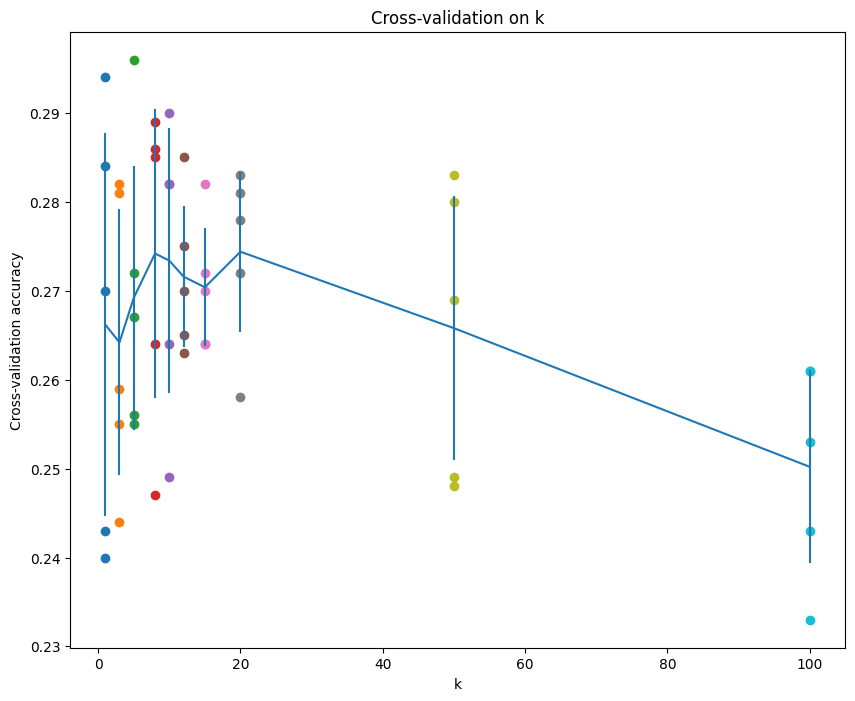

In [24]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [31]:
# Assuming all previous code has been executed and necessary variables are defined

# TODO: Based on the cross-validation results above, choose the best value for k,
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 12# Best k based on cross-validation

# Retrain the classifier using all the training data
knn_classifier = KNearestNeighbor()
knn_classifier.train(X_train_flat, y_train_subset)

# Compute distances between the test data and the training data
dists = knn_classifier.compute_distances_no_loops(X_test_flat)

# Predict labels for the test data using the best k
y_test_pred = knn_classifier.predict_labels(dists, k=best_k)

# Compute the number of correct predictions and the accuracy
num_correct = np.sum(y_test_pred == y_test_subset)
num_test = y_test_subset.shape[0]
accuracy = num_correct / num_test

print('%d / %d were correct => accuracy: %f' % (num_correct, num_test, accuracy))


141 / 500 were correct => accuracy: 0.282000


**Inline Question 3**

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than or equal to that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

**Your Answer:**

2 and 4

---

**Your Explanation:**

Let's evaluate each statement to determine which are true for a \( k \)-Nearest Neighbor (\( k \)-NN) classifier in a classification setting and for all values of \( k \).

---

### **1. The decision boundary of the k-NN classifier is linear.**

**Evaluation:**

- **False.**
- The decision boundary of a \( k \)-NN classifier is generally **non-linear** and can be highly complex, especially in higher-dimensional spaces.
- It is influenced by the distribution of the training data and can take arbitrary shapes to fit the data points.
  
**Conclusion:**

- **Statement 1 is false.**

---

### **2. The training error of a 1-NN will always be lower than or equal to that of 5-NN.**

**Evaluation:**

- **True.**
- In **1-NN**, each training point is its own nearest neighbor, so it will always be correctly classified (assuming no duplicate points with different labels).
- **Training error for 1-NN is typically zero** because every training example perfectly matches itself.
- In **5-NN**, a training point may have neighbors with different labels, leading to possible misclassification.
- Therefore, the training error of **1-NN** will be **lower than or equal to** that of **5-NN**.

**Conclusion:**

- **Statement 2 is true.**

---

### **3. The test error of a 1-NN will always be lower than that of a 5-NN.**

**Evaluation:**

- **False.**
- **Test error** depends on the classifier's ability to generalize to unseen data.
- **1-NN** can be highly sensitive to noise and may overfit the training data, leading to poor generalization.
- **5-NN** often provides a smoothing effect by considering multiple neighbors, which can improve generalization and potentially result in lower test error.
- There is **no guarantee** that 1-NN will always have lower test error than 5-NN; it varies depending on the dataset.

**Conclusion:**

- **Statement 3 is false.**

---

### **4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.**

**Evaluation:**

- **True.**
- To classify a test example, the \( k \)-NN algorithm computes the distance between the test example and **all training examples** to find the \( k \) nearest neighbors.
- The computational complexity is **\( O(ND) \)** per test example, where \( N \) is the number of training samples and \( D \) is the dimensionality.
- As the **size of the training set increases**, the time required to compute distances and identify nearest neighbors **grows linearly**.

**Conclusion:**

- **Statement 4 is true.**

---

### **5. None of the above.**

**Evaluation:**

- Since statements **2** and **4** are true, this option is **incorrect**.

**Conclusion:**

- **Statement 5 is false.**

---

**Final Answer:**

- The statements that are true are **2** and **4**.

